# 批量创建文件夹

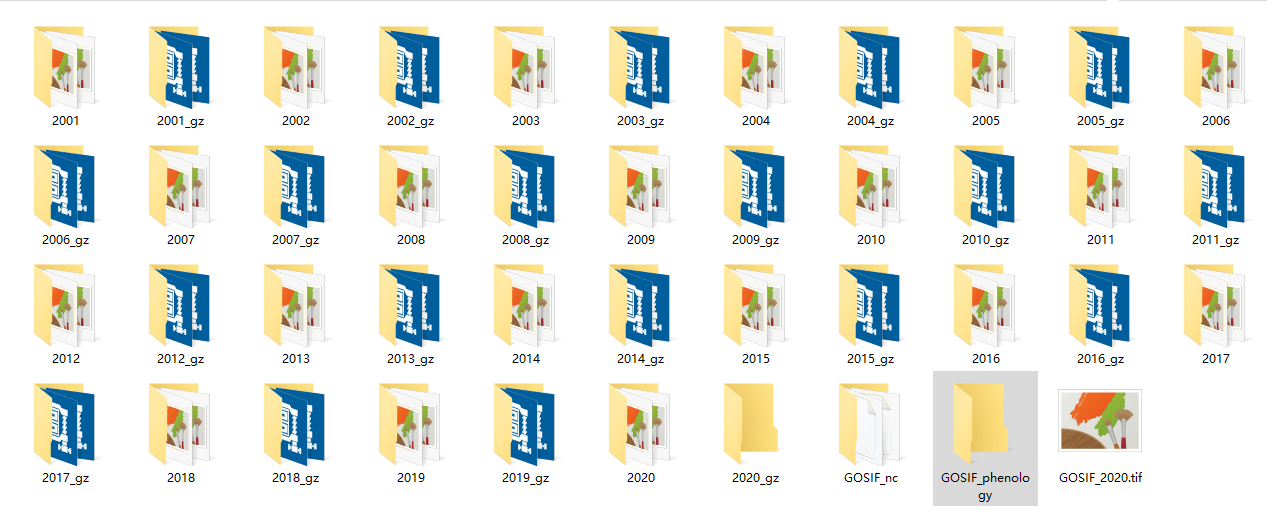

In [5]:
import os

path = 'E:\ERA5\TotalPre\CHN'
for i in range(2000, 2022):
    os.makedirs(path+"_%d" % i)

In [4]:
import os
data_oring = ["CRU", "ERA5", "MERRA2", "MSWX"]
path = 'E:/SUN/230329/'

for ori in data_oring[:]:
#     os.makedirs(path+f"JPG {ori} YEAR")
    os.makedirs(path+f"JPG {ori} LUC MONTH")


# 批量读取文件夹里的文件

In [ ]:
# -*- coding: utf-8 -*-
"""
Created on Tue Jun 14 09:29:08 2022

处理一年数据的模板

@author: MaYutong
"""
import netCDF4 as nc
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
import pandas as pd


def read_data():
    global lat, lon, t, time
    inpath = r'E:\ERA5\2mTem\CHN_t2m_2021.nc'
    with nc.Dataset(inpath, mode='r') as f:
        time = (f.variables['time'][:])
        lat = (f.variables['latitude'][:])
        lon = (f.variables['longitude'][:])
        t = nc.num2date(time, 'hours since 1900-01-01 00:00:0.0').data


def read_data_t2m(sentence):
    inpath = r'E:\ERA5\2mTem\CHN_t2m_2021.nc'
    with nc.Dataset(inpath, mode='r') as f:
        t2m = eval(sentence)
    return t2m


# %%
'''生成新的nc文件'''


def CreatNC(data1, yr, mon_name):

    new_NC = nc.Dataset(r"E:/ERA5/2mTem/2021/CHN_t2m_%d_%s.nc" %
                        (yr, mon_name), 'w', format='NETCDF4')

    new_NC.createDimension('lat', 401)
    new_NC.createDimension('lon', 701)
    new_NC.createDimension('time', mon[i])

    var = new_NC.createVariable('t2m', 'f', ("time", "lat", "lon"))
    new_NC.createVariable('lat', 'f', ("lat"))
    new_NC.createVariable('lon', 'f', ("lon"))

    new_NC.variables['t2m'][:] = data1
    new_NC.variables['lat'][:] = lat
    new_NC.variables['lon'][:] = lon

    var.description = ("ERA5 t2m %d %s 每日气温24时刻平均值" % (yr, mon_name))

    # 最后记得关闭文件
    new_NC.close()

# %%


def leap(years):
    if (years % 4 == 0 and years % 100 != 0) or (years % 400 == 0):
        return True
    else:
        return False


def daily(t2m):
    k = 0
    for k in range(mon[i]):
        t2m_daily = t2m[k:k+24, :, :].mean(axis=0)
        t2m_daily = t2m_daily.reshape(1, 401, 701)
        if k == 0:
            t2m_month = t2m_daily
        else:
            t2m_month = np.vstack((t2m_month, t2m_daily))

    return t2m_month


def month(yr):
    global ind1, mon, i
    if leap(yr) == True:
        day = np.array(xls.iloc[:, 5])
        mon = np.array(xls.iloc[:, 3])
        print("%d 是闰年" % yr)
    else:
        day = np.array(xls.iloc[:, 4])
        mon = np.array(xls.iloc[:, 2])
        print("%d 是平年" % yr)
    ind1 = list(map(lambda x: x*24, day))

    for i in range(1):
        if i == 11:
            t2m_index = "(f.variables['t2m'][ind1[i]:])"
            t2m = read_data_t2m(t2m_index)
            t2m_month = daily(t2m)
            CreatNC(t2m_month, yr, mon_name[i])

        else:
            t2m_index = "(f.variables['t2m'][ind1[i]:ind1[i+1]])"
            t2m = read_data_t2m(t2m_index)

        t2m_month = daily(t2m)
        #CreatNC(t2m_month, yr, mon_name[i])
        print("%d %s is done!" % (yr, mon_name[i]))


# %%
if __name__ == "__main__":
    xls = pd.read_excel(r"E:/ERA5/每月天数.xlsx")
    mon_name = np.array(xls.iloc[:, 1])
    read_data()

    yr = 2021
    month(yr)

# 批量重命名文件 os.rename()

In [ ]:
import os
path = r'G:/Gleamv3.6a/v3.6a/af_cg_monthly'

for file in os.listdir(path):
    os.rename(os.path.join(path, file), os.path.join(path, file[:-3]))